# Aygaz Makine Öğrenmesi Bootcamp: Yeni Nesil Proje Kampı

## Supervised ve Unsupervised Öğrenme Türleri¶
### Dataset: US Accidents (2016 - 2023)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.neighbors import KNeighborsClassifier #KNN İÇİN KÜTÜPHANE

from sklearn.model_selection import train_test_split #TEST İÇİN
from sklearn.metrics import accuracy_score #DOĞRULUK SKORU İÇİN

#ÇIKAN DOĞRULUKLARI İŞLEMEK İÇİN
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.linear_model import LogisticRegression #LOJİSTİK REGRESYON

from sklearn.cluster import KMeans #KMEANS

#KMEANSI SKORLAMA
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

from sklearn.preprocessing import StandardScaler


In [2]:
warnings.filterwarnings('ignore') #HER ŞEYDEN ÖNCE UYARILARI GİZLEDİK

In [3]:
df_original = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')
df = df_original 

# Eda (Veri setinin keşfi)

## Kullandığımız veri seti Amerikanın 49 eyaletinde olan kazaların bulunduğu veri setidir.Veri setinde kazanın ciddiyetini ml kullanark bulmaya çalışacağız. Burada bize en çok yardımcı olacak veri Start_Time ve End_Time verileridir. *Çünkü kazanın ciddiyeti ne kadar artar ise süre o kadar uzayacaktır.Bu kaza süresini sadece kaza olarak düşünmeyip kazanın sonrasını da içermektedir.*

## Kaza süresi dışında var ise Start_Lat ve End_Lat arasındaki korelasyondan bir çıkarım yaparak bulmaya çalışabiliriz.

In [4]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
df.isna().sum()  


ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

# Bazı verilerin işlenmesi

In [8]:
#burada öncelikle kazanın başlangıç ve bitiş tarihini objeden datetime tipine çeviriyoruz.
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Burada az önce elde ettiğimiz tarihi parça parça ayırıyoruz.
df['Yıl']=df['Start_Time'].dt.year
df['Ay']=df['Start_Time'].dt.strftime('%b')
df['Gün']=df['Start_Time'].dt.day
df['Saat']=df['Start_Time'].dt.hour
df = df.dropna(subset=['Start_Time'])  # Boş değerleri siler çünkü .dt boş değerlerde hata verecek
df['Haftanın Günü']=df['Start_Time'].dt.strftime('%a')

#total kaza süresini alır tks olarak tutar ve timedelta64 ile dakikaya dönüştürür.
tks='Total Kaza Suresi'
df[tks]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985228 entries, 0 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code           obje

In [9]:
max_duration = df[tks].max()
min_duration = df[tks].min()

max_duration_hours = round(max_duration / 60)
max_duration_days = round(max_duration / (60 * 24))

print('En uzun kaza temizlenme süresi: {} saat ve ya {} gun; Minimum {} dk.'.format(max_duration_hours, max_duration_days, min_duration))


En uzun kaza temizlenme süresi: 46882 saat ve ya 1953 gun; Minimum 1.0 dk.


#### Burada hata yaptım çünkü burada outlinersı çıkarmam gerekiyor yoksa veriler çok sapar.

In [10]:
ss=3 #STANDART SAPMAYI 3 OLARAK SEÇTİK
median = df[tks].median() #TAHMİNİ KAZA SÜRESİNİN MEDYANI ALINDI
std = df[tks].std() 
outliers = (df[tks] - median).abs() > std*ss #AYKIRI DEĞERLER BULUNDU
df[outliers] = np.nan #AYKIRI DEĞERLER SİLİNDİ
df[tks].fillna(median, inplace=True) #SİLİNEN DEĞERLER MEDYAN İLE DOLDURULDU

In [11]:
max_duration = df[tks].max()
min_duration = df[tks].min()

max_duration_hours = round(max_duration / 60)
max_duration_days = round(max_duration / (60 * 24))

print('En uzun kaza temizlenme süresi: {} saat ve ya {} gun; Minimum {} dk.'.format(max_duration_hours, max_duration_days, min_duration))


En uzun kaza temizlenme süresi: 663 saat ve ya 28 gun; Minimum 1.0 dk.


In [12]:
df.isnull().sum()

ID                          4789
Source                      4789
Severity                    4789
Start_Time                  4789
End_Time                    4789
Start_Lat                   4789
Start_Lng                   4789
End_Lat                  3407535
End_Lng                  3407535
Distance(mi)                4789
Description                 4794
Street                     13258
City                        5015
County                      4789
State                       4789
Zipcode                     6465
Country                     4789
Timezone                   11572
Airport_Code               23937
Weather_Timestamp         110947
Temperature(F)            150778
Wind_Chill(F)            1978406
Humidity(%)               160029
Pressure(in)              129973
Visibility(mi)            162783
Wind_Direction            158061
Wind_Speed(mph)           553936
Precipitation(in)        2176928
Weather_Condition         160145
Amenity                     4789
Bump      

#### Burada çözemediğim bir hata var outliners çıkarırken null değerlerimin sayısı çok arttı

In [13]:
#KULLANILACAK ÖZELLİKLERİ BURADA SEÇTİK 
feature_lst=['Source','Severity','Start_Lng','Start_Lat','Distance(mi)','City','County','State','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Saat','Haftanın Günü', 'Total Kaza Suresi']

In [14]:
#KULLANILACAK VERİ KÜMESİNİ SEÇİLEN OLARAK ATADIK
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985228 entries, 0 to 7728393
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Source             object 
 1   Severity           float64
 2   Start_Lng          float64
 3   Start_Lat          float64
 4   Distance(mi)       float64
 5   City               object 
 6   County             object 
 7   State              object 
 8   Amenity            object 
 9   Bump               object 
 10  Crossing           object 
 11  Give_Way           object 
 12  Junction           object 
 13  No_Exit            object 
 14  Railway            object 
 15  Roundabout         object 
 16  Station            object 
 17  Stop               object 
 18  Traffic_Calming    object 
 19  Traffic_Signal     object 
 20  Turning_Loop       object 
 21  Saat               float64
 22  Haftanın Günü      object 
 23  Total Kaza Suresi  float64
dtypes: float64(6), object(18)
memory usage: 1.3+ GB


### 

## Kullanılacak veriyi küçültme

Bütün veri üzerinde çalışamadığımdan dolayı veriyi küçülterek kullanacağım veriyi küçültürken hangi stateslerden vakalardan anlamlı sonuç elde edebilirim ona bakacağım. Bunun için vaka sayısının stateslere yığılımını gösteren bir grafik çalıştım

<Axes: xlabel='Count', ylabel='State'>

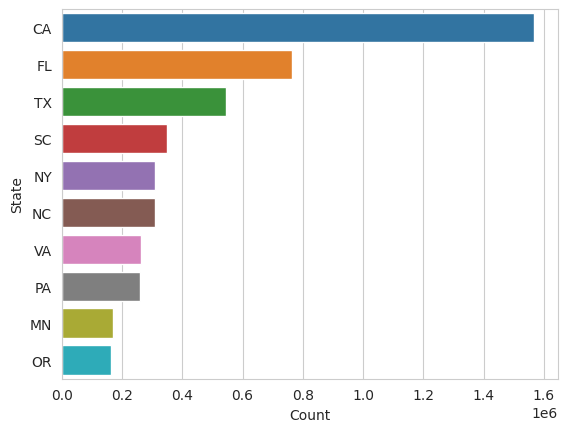

In [15]:
#STATELERDEKİ KAZA YOĞUNLUĞUNU BİZE SÖYLEYEREK KULLANACAĞIMIZI SEÇMEDE YARDIMCI OLUR.
states = df.State.unique()
unique_states_count = len(states)

states_by_accidents = df.State.value_counts().reset_index(name='Count')
states_by_accidents.sort_values('Count')
sns.set_style(style = 'whitegrid')
sns.barplot(states_by_accidents.head(10), y='State', x='Count')

Yukarıdan herhangi bir veriyi alıyoruz.

In [16]:
state='CA'# State olarak CALİFORNİA SEÇTİM

df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)

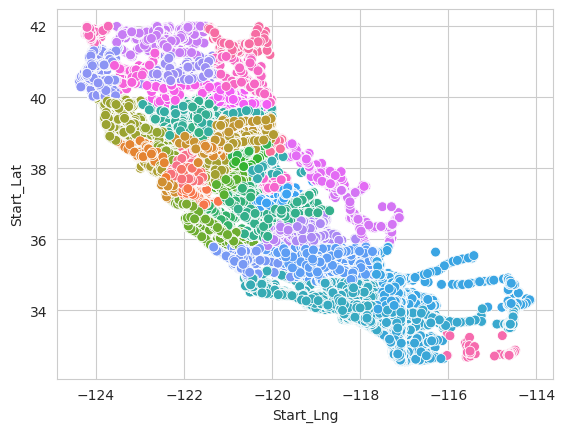

In [17]:
#RENK RENK COGRAFI DAGILIM GRAFIGI CA İÇİNDEKİ İLÇELER

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=50)
plt.show()

In [18]:
#İLÇELERİ BİZE YAZDIRARAK AŞAĞIDA SEÇİM YAPMAMIZI KOLAYLAŞTIRIR.
listed_county = df_state['County'].unique()
print(sorted(listed_county))


['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba']


### İLÇE LİSTESESİNİ YUKARIDA GÖREREK AŞAĞIDA SEÇEBİLRİİZ

In [19]:
#İLÇE SEÇ
county='Los Angeles'

df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479583 entries, 42864 to 7728392
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Source             479583 non-null  object 
 1   Severity           479583 non-null  float64
 2   Start_Lng          479583 non-null  float64
 3   Start_Lat          479583 non-null  float64
 4   Distance(mi)       479583 non-null  float64
 5   City               479578 non-null  object 
 6   Amenity            479583 non-null  object 
 7   Bump               479583 non-null  object 
 8   Crossing           479583 non-null  object 
 9   Give_Way           479583 non-null  object 
 10  Junction           479583 non-null  object 
 11  No_Exit            479583 non-null  object 
 12  Railway            479583 non-null  object 
 13  Roundabout         479583 non-null  object 
 14  Station            479583 non-null  object 
 15  Stop               479583 non-null  object 
 16  Tr

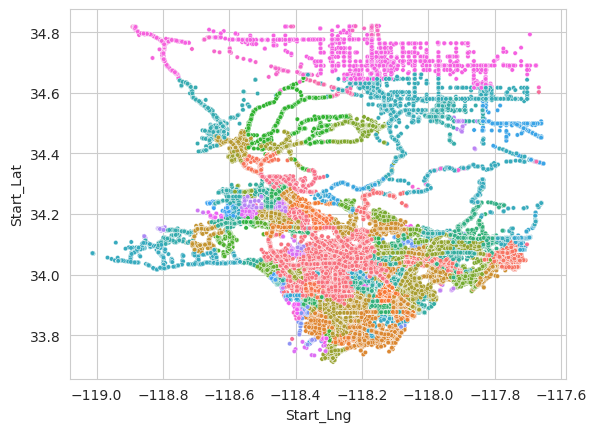

In [20]:
#RENK RENK İLÇE İÇİNE GÖRE KAZA GRAFİĞİ

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=False, s=10)#çok fazla veri olduğundna büyükleüklerini küçülttüm 
plt.show()

## One-Hot Encoding 

Verileri syısal veriye dönüştürüyoruz


In [21]:
# DUMMIES OLUSTURUR. 
df_county_dummy = pd.get_dummies(df_county,drop_first=True)
df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479583 entries, 42864 to 7728392
Columns: 187 entries, Severity to Haftanın Günü_Wed
dtypes: bool(181), float64(6)
memory usage: 108.4 MB


In [22]:
# DUMMIESI ANA DATAFRAMEYE ATIYORUZ
df=df_county_dummy

target='Severity' #TARGETI CIDDYET OLARAK SECTIK

#X VE Y SEÇİLİYOR X TEN TARGETI ÇIKARMAYI UNUTMUYORUZ
y = df[target]
X = df.drop(target, axis=1)

#DATAYI TRAIN VE TEST OLARAK AYIRIYORUZ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [23]:
# LOJISTIK REGRESYON
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train) #x eğitim veri seti, y hedef // model eğitilir
y_pred=lr.predict(X_test) #burada tahmin yapmakta.

#DOGRULUK SKORUNU BURADAN ALIYORUZ
acc=accuracy_score(y_test, y_pred)

print("lojistik regresyon doğruluk oranı: {:.3f}.".format(acc))

lojistik regresyon doğruluk oranı: 0.813.


In [24]:
#KNN SINIFLANDIRICISINI 6 OLARAK AYARLIYORUZ 
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train) #MODEL BURADA EGITILIYOR
y_pred = knn.predict(X_test) #TAHMINI BURADA 


#KNN TUTARLILIGINI HESAPLAR
sonuc= knn.score(X_test, y_test)


print('Knn Skoru doğruluk oranı: {:.3f}.'.format(sonuc))

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("Karmaşıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))


Knn Skoru doğruluk oranı: 0.848.
Sınıflandırma Raporu:
              precision    recall  f1-score   support

         1.0       0.40      0.02      0.03       250
         2.0       0.87      0.94      0.90    108353
         3.0       0.74      0.60      0.67     34208
         4.0       0.46      0.09      0.15      1064

    accuracy                           0.85    143875
   macro avg       0.62      0.41      0.44    143875
weighted avg       0.84      0.85      0.84    143875

Karmaşıklık Matrisi:
[[     4    183     63      0]
 [     4 101336   6958     55]
 [     2  13519  20632     55]
 [     0    813    156     95]]


Bu sonuç yukarıda seçtiğimiz CA nın Los Angeles kısmı için doğrudur aksi halde sonuçlar değişecektir. Bütün veri üzerinde çalışamadım. Bu verinin bile California kısmı büyük olduğu için çok uzun sürede çalışmaktadır.

AMA BENİM ÇALIŞTIĞIM BİÇİMDE KNN'İN CA-LA ÜZERİNDE DOĞRULUK ORANI DAHA YÜKSEKTİR

## UNSUPERVİSED // K-MEANS 

Sıra unsupervised olarak çalışacağımız k-means algoritmasına geldi. Bu algoritmayı kullanmak için ilk önce verilerin normalize edilmesi gerekmekte.

büyük ihtimal gerek yok

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_county_dummy)


Parametre olarak k nın en optimumunu bulmak için k-elbow kullanarak optimum k yı bulup onu k-means'ta yerine yazacağız

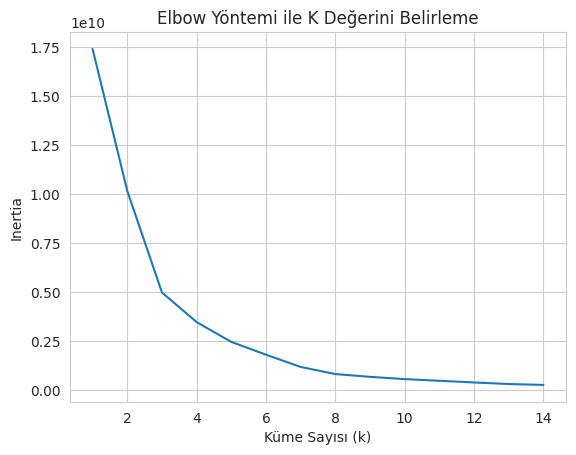

In [25]:
#parametre optimizasyonunu yapan hazır bir kod parçacığı kullandım hocamız derste anlatmıştı zaten.
sse = []
k_range = range(1, 15)

#15 E KADAR CLUSTERLARI DENEYEREK EN İYİ CLUSTER DEĞERİNİ BİZE SUNAN FONKSİYON
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42 
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(k_range, sse)
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi ile K Değerini Belirleme')
plt.show()


In [26]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [27]:
#bu değerlendirme kritlerlerini Göker hocamızın attığı collab dosyasından aldım.

#KÜME ETİKETLERİNİN GERÇEK ETİKETLERE NE KADAR UYUMLU OLDUĞUNU SÖYLER
print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))

#HER KÜMENİN YALNIZCA TEK BİR SINIFA AİT VERİ NOKTASI OLUP OLMADIĞINI SÖYLER
print("Homojenlik Skoru:", homogeneity_score(y, kmeans.labels_))

#AYNI SINIFA AİT VERİ NOKTALARININ AYNI KÜMEDE OLUP OLMADIĞINI SÖYLER
print("Completentlik Skoru:", completeness_score(y, kmeans.labels_))

#YUKARIDAKİ İKİ SKORUN ORTALAMASINI SÖYLER
print("V-Measure Skoru:", v_measure_score(y, kmeans.labels_))

Adjusted Rand Index: -0.07350418951660875
Homojenlik Skoru: 0.09543661311866801
Completentlik Skoru: 0.06293857734687795
V-Measure Skoru: 0.0758533535314053


## Sonuç

#### Unsupervised'öğrenme yöntemi olan k-means üzerinde yaptığım testlerde sonuçlar çok iyi gelmedi. O yüzden Supervised olarak Knn kullanmak en mantıklısı duruyor.